# Partition-based clustering

## _K_-Means Algorithm
_K_-Means is an iterative algorithm that tries to separate a given dataset into _K_ number of clusters and minimize the distance between data points and their respective cluster centroid. It is one of the simplest and popular clustering algorithms.

The whole process of _K_-Means is summarized in the following few steps:

__Input:__ $$ \mathbf x_1, \mathbf x_2, \dots , \mathbf x_N $$

where,

- $N$ = total number of samples
- $\mathbf x_i$ = $i^{th}$ sample from the dataset $X$ where $\mathbf x_i \in \mathbb R^Z$
- $Z$ = total number of features/attributes

__Output:__ Vector $\mathbf{c}_N$ of cluster assignments in $\mathbb R^N$, and $K$ number of mean vectors $\boldsymbol \mu_k$ where matrix of all $K$ means is in $\mathbb R^{K \times Z}$

__Steps:__

1. Specify the number of clusters $K$.
2. Initialize the cluster centroids with any initialization methods.

3. Compute the distance between each point and each cluster centroids(Euclidean distance metric is a popular choice) Where distance is a vector in $\mathbb R^{N} $ for all data points and for all $K$ centroids, distances will be a matrix in $\mathbb R^{K \times N} $.

$$ distance = \|\mathbf{x}_i - \boldsymbol\mu_k \|_2^2$$


4. Assign each point to the closest cluster centroid (minimum distance).

5. Compute the new cluster centroid for each cluster by taking the mean of all the data points in that cluster.
6. Repeat steps 3-5 until there is no change in the cluster centroids.

**Note**: *Initialization (Step 2) can be done by randomly sampling the centroids from the range of the data or by using methods like K-Means++. We will discuss more on the initialization later in this chapter.*


In [1]:
#@title **Experimental Cell: KMeans Clustering**

from IPython.display import display
from IPython.display import IFrame

display(IFrame('https://kmeans.netlify.app', height=450, width='100%'))

## _K_-Means Objective Function


The _K_-Means algorithm's objective is to minimize the sum of squared distance between data points and the centroid within a cluster and maximize the distance between different clusters.

We can use the following objective function to minimize the distance between data points and the centroid which makes a tighter cluster and distance between other clusters are automatically maximized.
$$
\mathcal J =\underset{\boldsymbol \mu, \boldsymbol c}{\arg\min} \sum_{k=1}^K \sum_{i = 1}^N \mathbb{1} \{\boldsymbol c_i = k\} \|\mathbf{x}_i - \boldsymbol{\mu}_k \|^2_2 \tag{1}\\
$$


Where,
* $\mathcal J$ is the objective function.

* $K$ is the number of clusters and $N$ is the total number of samples.

* $\mathbf{x}_i$ is the vector of $i^{th}$ data point.

* $\boldsymbol c$ is a cluster assignments vector which contains the index of $k^{th}$ cluster in which $i^{th}$ data point belongs to.

* $\mathbb{1} \{\boldsymbol c_i = k\}$ is an indicator function of a set which equals to 1 if the $\boldsymbol c_i = k$ else 0.

* $\boldsymbol \mu_k$ is the vector of $k^{th}$ cluster centroids:
$$
\boldsymbol \mu_k = \frac{\sum^N_{i : \boldsymbol c_i=k} \mathbf{x_i}}{|\boldsymbol c_{i=k}|}. \tag{2}
\\
$$

In a plain language, above objective function in equation (1) finds the $\boldsymbol \mu$ and $\boldsymbol c$ which minimizes the distance between $\mathbf x_i$ and $\boldsymbol \mu_k$ where the given $\mathbf x_i$ is in cluster assignments $\boldsymbol c_{i=k}$.

*Note: The objective function of K-Means is referred to as Sum of Squared Error (SSE) or the Residual Squared Error (RSS).*


Since _K_-Means is an **iterative algorithm**, it's objective function cannot be optimized by taking derivatives and setting zero. **We have to use some iterative optimization algorithms like Gradient Descent, but the problem here is our objective function is composed of two dependent unknowns: $\boldsymbol \mu$ and $\boldsymbol c$. Gradient Descent algorithm attempts to update all parameters at same time but we cannot find their best values at the same time to minimize our objective function $\mathcal J$**. However, we can fix the value of $\boldsymbol \mu$ and find the best $\boldsymbol c$, and after that, we can fix the value of $\boldsymbol c$ and find the best $\boldsymbol \mu$.

This process of holding on one set of parameters fixed and optimizing the other, and vice-versa is called the **Coordinate Descent** optimization approach.


## Code Demo:

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [35]:
# Reading DATA
dataset = pd.read_csv("IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
dataset.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

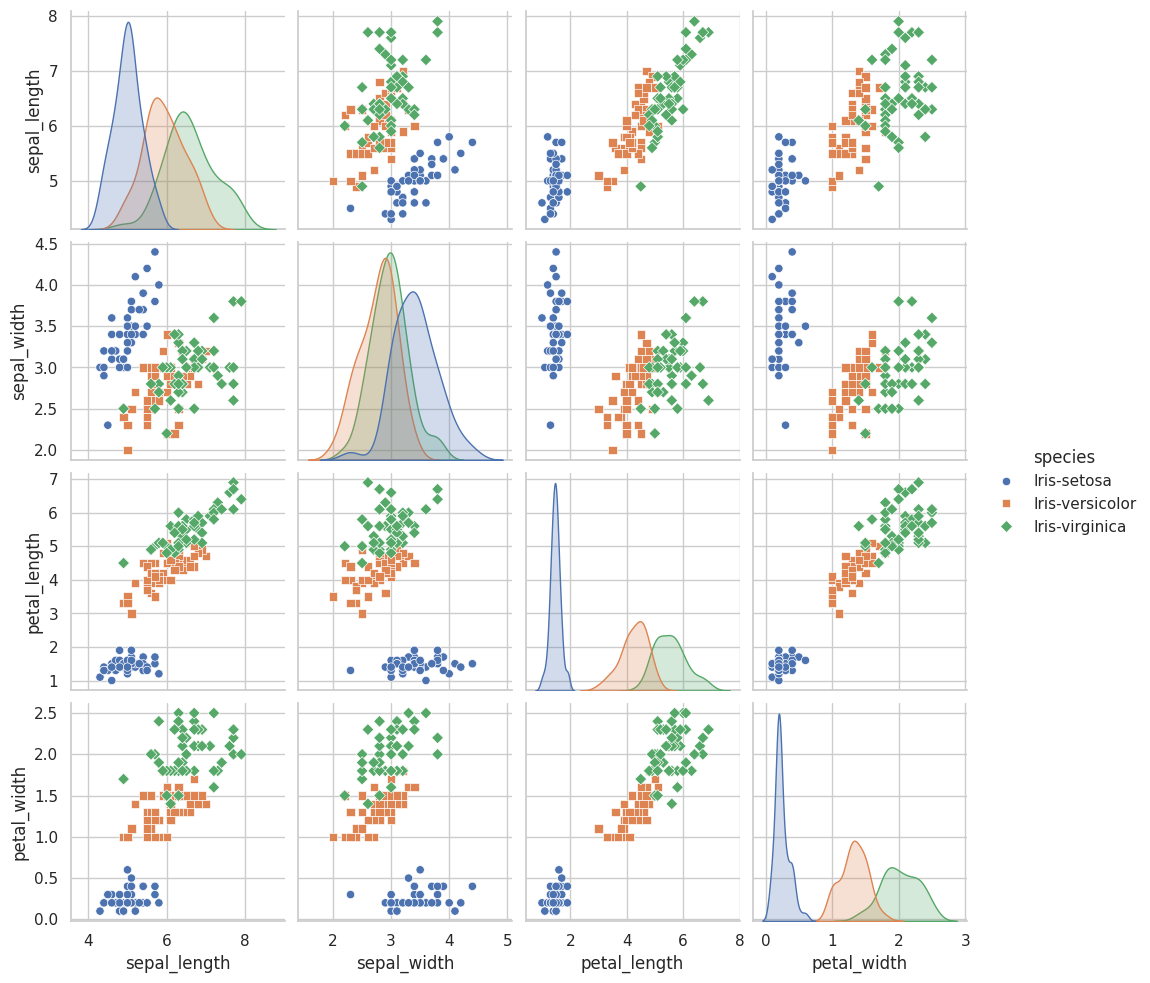

In [36]:
sns.set(style='whitegrid')
sns.pairplot(dataset, hue='species', markers=['o','s','D'], diag_kind='kde')
plt.show()

In [38]:
# Features and Target
X_orgi = dataset.drop('species', axis =1).to_numpy()
y = dataset['species']

In [39]:
scaler = StandardScaler()
X = scaler.fit_transform(X_orgi)

## Number of Cluster

### Elbow Method

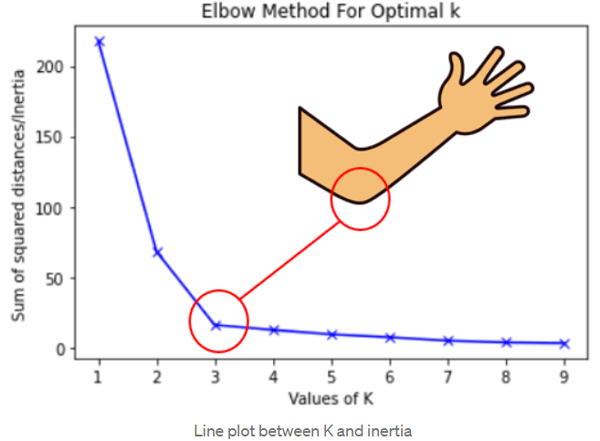

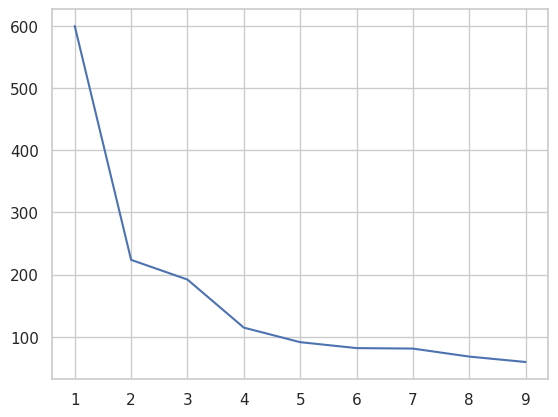

In [40]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(
        n_clusters=i,
        init="k-means++",
        random_state = 42
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10), wcss)

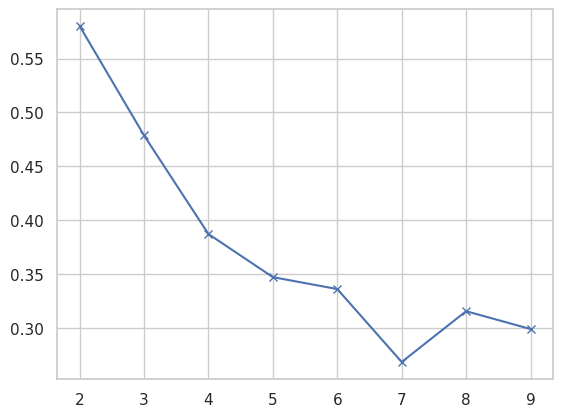

In [41]:
silhouette = []
for i in range(2,10):
    kmeans = KMeans(
        n_clusters=i,
        random_state = 42
    )
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette.append(silhouette_score(X,cluster_labels))

plt.plot(range(2,10), silhouette, 'bx-')

## Centroid Initialization

### Random/ Frogy Initialization

Forgy initialization is the simplest method of cluster centroid initialization. In Forgy initialization, we pick the random _K_ points from the available data points and assign them as a cluster centroids.

### _K_-Means++

The _K_-Means++ is the popular centroid initialization method. This algorithm carefully selects the initial centroids for _K_-Means clustering. It follows a simple probability-based approach where the first centroid is selected at random and after that, the squared distance is calculated for all the data points with that centroid. For the next centroid, a data point that has the largest distance has the highest probability of being selected. This selection is decided based on a weighted probability score which we will also see in the code snippet below. The selection is continued until we have _K_ centroids, and then _K_-Means clustering is done using these centroids

<div align="center">
    <figure>
<p>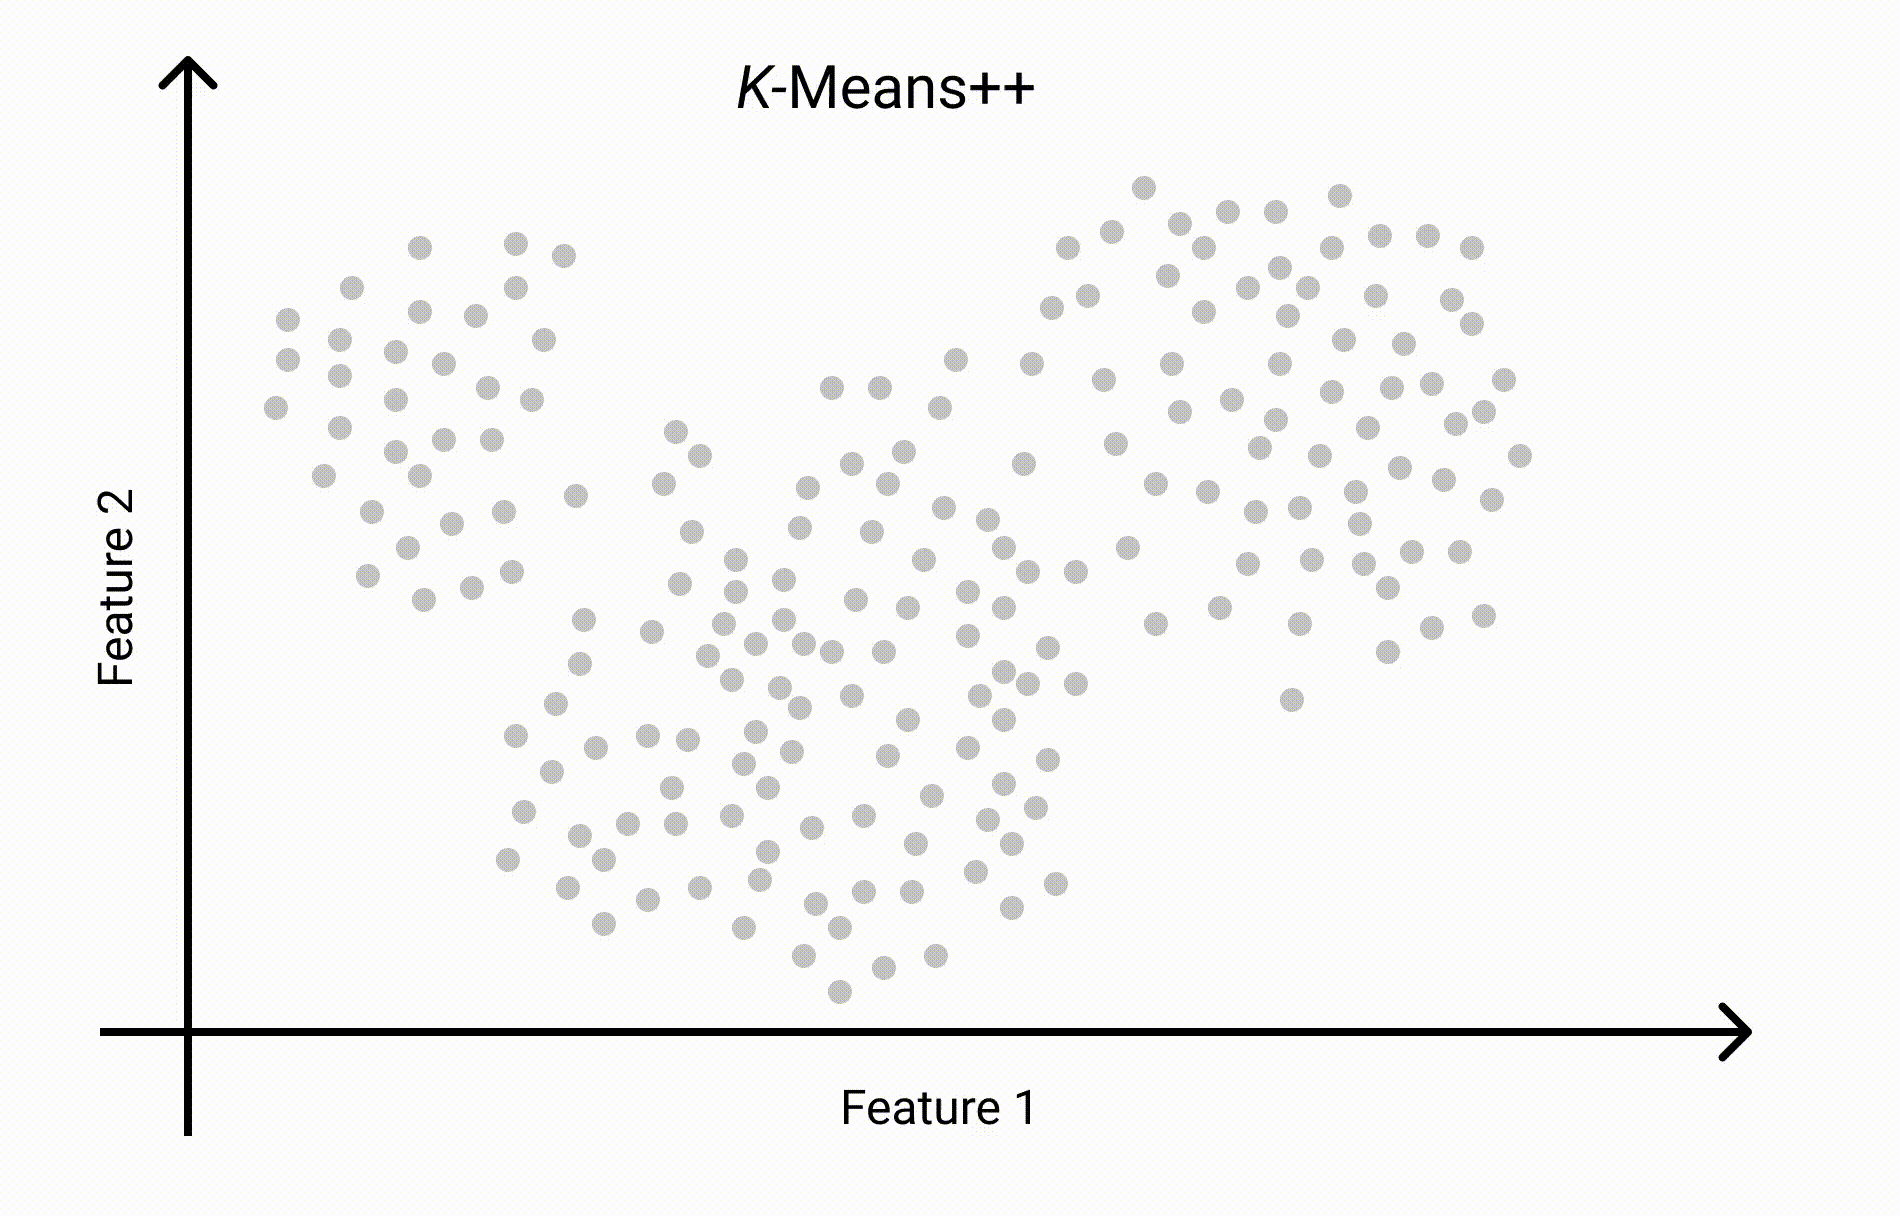</p>
     <figcaption>Figure 4: K-Means++ initialization</figcaption>
    </figure>
</div>

**Algorithm KMeans++**

1. Initialize _K_ and pick first initial centroid at random from the dataset.
2. Calculate distance from the first centroid to all data points.
3. Pick next centroid which is farthest from the first centroid using some weighted probability score.
4. Repeat 2-3 until _K_ clusters reached.

In [45]:
# KMeans
K = 3
centroid_init = "k-means++"

In [46]:
kmeans_model = KMeans(n_clusters=K, init=centroid_init, random_state=42)
kmeans_model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [52]:
centers = kmeans_model.cluster_centers_

In [51]:
y_pred = kmeans_model.labels_

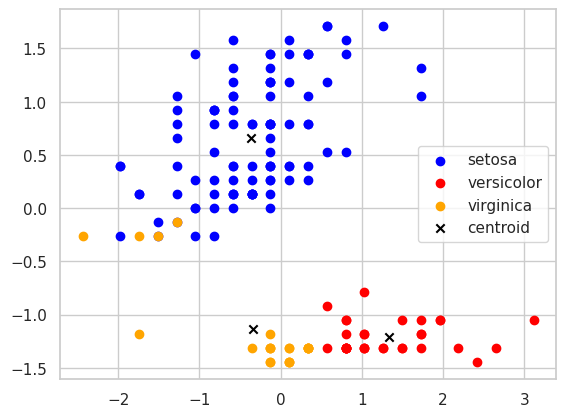

In [70]:
# Plotting
plt.scatter(X[y_pred==0,1],X[y_pred==0,3],c='blue', label = 'setosa')
plt.scatter(X[y_pred==1,1],X[y_pred==1,3],c='red', label = 'versicolor')
plt.scatter(X[y_pred==2,1],X[y_pred==2,3],c='orange',label = 'virginica')

plt.scatter(centers[:,1], centers[:,3], c='black', marker = 'x' ,label = 'centroid')

plt.legend()
plt.show()